<a href="https://colab.research.google.com/github/justpqa/Lol_player_evaluation/blob/main/Lol_performance_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Do personal performance affect the result of LOL games

League of Legends (or LOL) has been (arguably) the most popular MOBA games in the world. As a 5v5 games, for most people, an individual player cannot affect how the result of the game would be, while for others, a player can decide his/her own result by their own performance. To (somewhat) uncover this mystery, I have analyzed a dataset in Kaggle (https://www.kaggle.com/datasets/jasperan/league-of-legends-1v1-matchups-results) of more than 1 millions LOL individual performances, as well as using different ML models to answer our question "Can we predict the result of the game based on individual performance?."

#### 1. Importing required packages for manipulating and visualizing our data

In [ ]:
#Packages for manipulating the data
import numpy as np
import pandas as pd

In [ ]:
#packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 2. Import our dataset

In [ ]:
lol = pd.read_csv('/content/drive/MyDrive/matchups.csv')

In [ ]:
#Check the head of our dataset
lol.head()

,P_MATCH_ID,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,PUUID,TOTALDAMAGEDEALTTOCHAMPIONS,SUMMONERNAME,GAMEVERSION,Unnamed: 13
0,TR1_1201957752_top,14425,194,False,14,5,7,Kassadin,17,phduyQLB8gBjUerFwiVOtyLLHE9jxw7Jq7dwab_CtRddAv...,33426,Borke,11.14.384.6677,NaN
1,TR1_1201957752_top,12920,177,True,3,13,6,Fiora,17,SgQ5hm74vmXVDB3GIt3ka7gaBXFpNnT3PbHU8TbjEk5PJ8...,12092,Nora Durst,11.14.384.6677,NaN
2,TR1_1201957752_middle,13483,221,False,7,3,6,Yone,20,m7Sxq9HxRKLIgf0n0QOKhfHq8jNMZ-k1VhW_jcb307sUya...,20604,Fightêr Yone,11.14.384.6677,NaN
3,TR1_1201957752_middle,11375,167,True,4,15,7,Corki,27,pa-g2VGIEJn7CJCYYQU1PaHUqjS9pB7M4PsDcjM3ac5ysM...,30150,AM SORİİ HE,11.14.384.6677,NaN
4,TR1_1201957752_bottom,11320,197,False,5,10,12,Kaisa,17,_WeC06P4yIMW7ZMWi6bmwCagXp7c7bxxGv6nNW4--SGqXp...,16689,º J İ N X º,11.14.384.6677,NaN


In [ ]:
#check the information of our dataset
lol.info()
#This table can imply that this is a quite full dataset, having nearly no NAs (NAs are on SUMMONERNAME, which we would not care about much in the scope of this notebook)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312252 entries, 0 to 1312251
Data columns (total 14 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   P_MATCH_ID                   1312252 non-null  object 
 1   GOLDEARNED                   1312252 non-null  int64  
 2   TOTALMINIONSKILLED           1312252 non-null  int64  
 3   WIN                          1312252 non-null  bool   
 4   KILLS                        1312252 non-null  int64  
 5   ASSISTS                      1312252 non-null  int64  
 6   DEATHS                       1312252 non-null  int64  
 7   CHAMPION                     1312252 non-null  object 
 8   VISIONSCORE                  1312252 non-null  int64  
 9   PUUID                        1312252 non-null  object 
 10  TOTALDAMAGEDEALTTOCHAMPIONS  1312252 non-null  int64  
 11  SUMMONERNAME                 1312249 non-null  object 
 12  GAMEVERSION                  1312252 non-n

In [ ]:
#what features are in the dataset
print(lol.columns.values)

['P_MATCH_ID' 'GOLDEARNED' 'TOTALMINIONSKILLED' 'WIN' 'KILLS' 'ASSISTS'
 'DEATHS' 'CHAMPION' 'VISIONSCORE' 'PUUID' 'TOTALDAMAGEDEALTTOCHAMPIONS'
 'SUMMONERNAME' 'GAMEVERSION' 'Unnamed: 13']


#### 3. Wrangle our data

The column "Unnammed: 13" is a blank column, so we drop this column first.

In [ ]:
lol.drop("Unnamed: 13", axis = 1, inplace = True)

Next, we would like to drop the "SUMMONERNAME" and "PUUID" column, since in the scope of this notebook, these columns would not be "helpful" in predicting the results.

In [ ]:
lol.drop(["SUMMONERNAME", "PUUID"], axis = 1, inplace = True)

When we look at the "P_MATCH_ID" column, we can see that this column consist of 3 information in the form: region_matchid_role, so this column can be split into 3 columns: region, match, and role. After that, we will be able to drop "P_MATCH_ID". 

In [ ]:
#create column for role
lol['Role'] = lol['P_MATCH_ID'].apply(lambda x: x.split('_')[2])

#create column for match
lol['Match'] = lol['P_MATCH_ID'].apply(lambda x: x.split('_')[1])

#reate column for region/server
lol['Region'] = lol['P_MATCH_ID'].apply(lambda x: x.split('_')[0])

In [ ]:
#drop P_MATCH_ID
lol.drop('P_MATCH_ID', axis = 1, inplace = True)

In [ ]:
#check the dataset after done all above steps
lol.head()

,GOLDEARNED,TOTALMINIONSKILLED,WIN,KILLS,ASSISTS,DEATHS,CHAMPION,VISIONSCORE,TOTALDAMAGEDEALTTOCHAMPIONS,GAMEVERSION,Role,Match,Region
0,14425,194,False,14,5,7,Kassadin,17,33426,11.14.384.6677,top,1201957752,TR1
1,12920,177,True,3,13,6,Fiora,17,12092,11.14.384.6677,top,1201957752,TR1
2,13483,221,False,7,3,6,Yone,20,20604,11.14.384.6677,middle,1201957752,TR1
3,11375,167,True,4,15,7,Corki,27,30150,11.14.384.6677,middle,1201957752,TR1
4,11320,197,False,5,10,12,Kaisa,17,16689,11.14.384.6677,bottom,1201957752,TR1


Now we have a better dataset for analyzing, and we are able to explore more from this data. 

#### 4. Exploratory Data Analysis

The first thing that we would like to know is how variables are correlated to each other in our dataset.

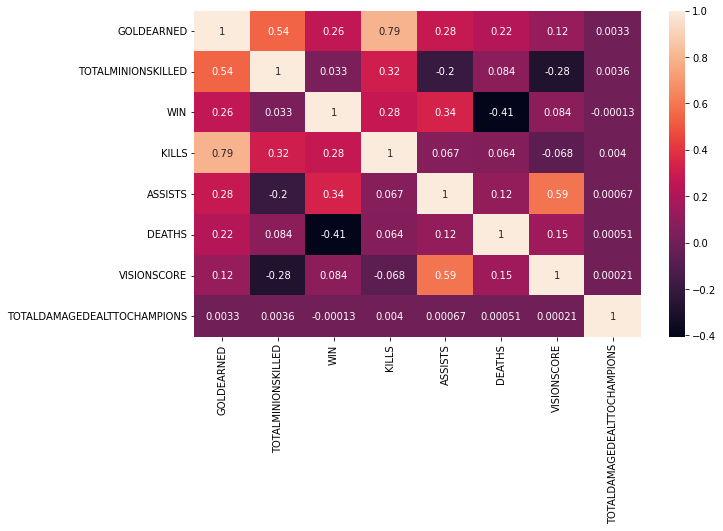

In [ ]:
#heatmap of correlation
plt.subplots(figsize = (10,6))
sns.heatmap(lol.corr(), annot = True)

As we can see through this heatmap, gold earned, kills, deaths, and assists are the four most correlated variables to whether the player win, which is easy to explained as these are the most important statistics in LOL match and are always analyzed first when talking about a match. 

In the scope of our question, we would mostly focus on how different factors affect winrate of a game. 

a. Win vs. Gold earned

The first thing that we would want to investigate is how gold earned by a player at different roles would affect win rate, because of the speciality in playstyle of each role.

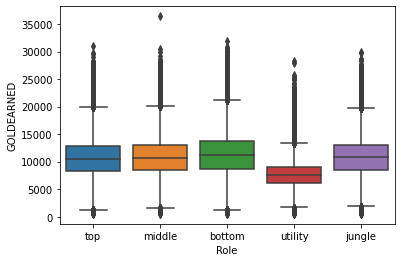

In [ ]:
#The amount of gold earned in each role
sns.boxplot(data = lol, x = 'Role', y = 'GOLDEARNED')

Apart from the support (utility) role, the distribution of gold in every role are nearly the same, with AD (bottom) has a slightly larger IQR (utility has the lowest range and IQR)

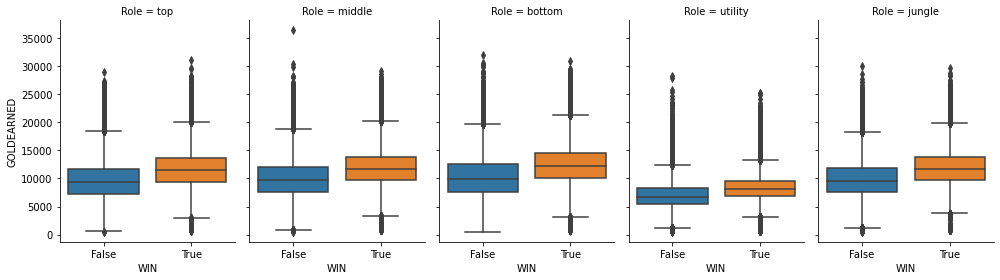

In [ ]:
#Amount of gold earned vs. whether the player win or not
sns.catplot(x='WIN', y='GOLDEARNED', col='Role', data=lol, kind='box',height=4, aspect=.7);

Overall, it is easy to indicate that the gold earned for a winning player is higher than a losing player, with about 3000 gold in difference, despite the fact that each role can have a different gold amount. This can be explained as gold difference can lead to items difference, which would lead to power difference and affect the game result (3000 gold behind can be considered equivalent to an item deficit.)

b. Win vs. Kills, Assists, and Deaths

Next we would like to explore how Kills, Assists, and Deaths would affect the win rate, as these are direct statistics created by result of combats. For those who are not familiar with the game:
*   Kills: number of times a player kills an opponent
*   Assists: number of times a player helps ones team to kill an opponent, without directly killing the opponent
*   Deaths: number of times a player is taken down by opponents. 

In LOL, those are the main metrics when players looked back at their performance in a game, and they sometimes are considered the main way to measure ones performance in a game. In this part, I will visualize how these stats are correlated to win rates. But at first, we will start by looking into the relationship of kills, deaths, and assists.

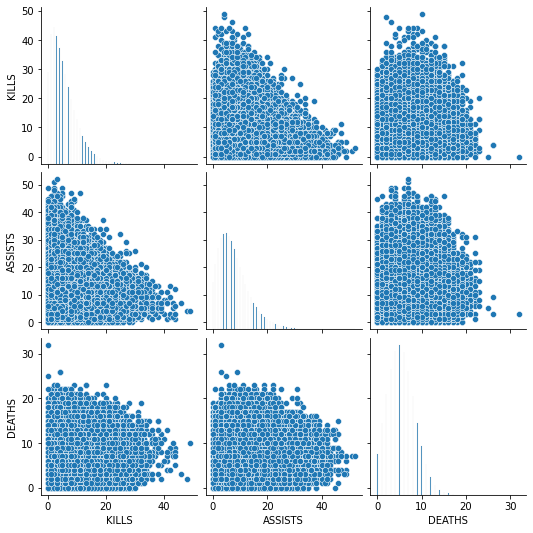

In [ ]:
sns.pairplot(lol[['KILLS','ASSISTS','DEATHS']])

From these plots, we can see that there is a negative relationship between kills and assists, and the distribution for number of kills is a little bit more skewed than assists. For the number of deaths, there is nearly no correlation between this variable and kills or assists, and its distribution if also more "normal" comparing to other variables. 

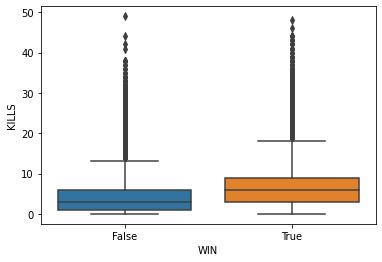

In [ ]:
sns.boxplot(x = 'WIN', y = 'KILLS', data = lol)

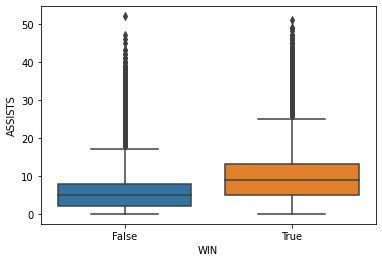

In [ ]:
sns.boxplot(x = 'WIN', y = 'ASSISTS', data = lol)

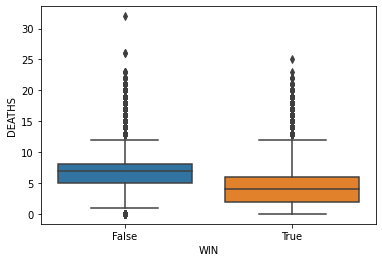

In [ ]:
sns.boxplot(x = 'WIN', y = 'DEATHS', data = lol)

With these plots, we can see a "common" trend in League of Legends: the more kills and assists you have, the higher the win rates, but the more deaths you have, the lower the win rates, as there is a substantial difference in the mean of kills, assists vs. deaths for wins and losses. This can be explained as more kills and assists would make your champion reaches its power earlier than the opponent; therefore, you will have more advantage to "snowball" and win the game. 

For other statistics (vision score, minions killed, and total damaged dealt), since its correlation to win are very small (less than 0.1), so we will not analyzed them more in the scope of this notebook. The only new trend that we can see is that there is a very slightly negative relationship between damage dealt and win rate, as champion that deal more damage should have more winning chance.

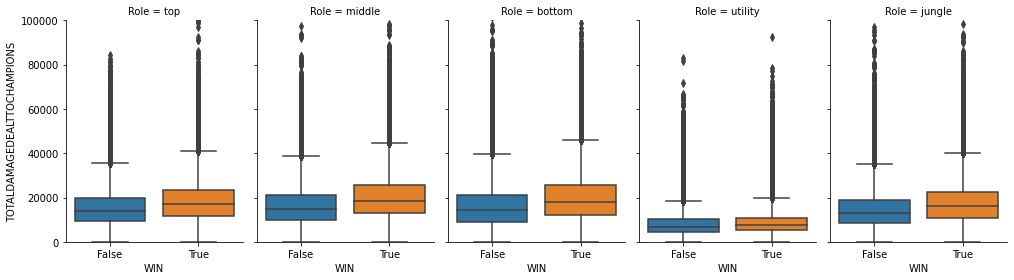

In [ ]:
g = sns.catplot(x='WIN', y='TOTALDAMAGEDEALTTOCHAMPIONS', col='Role', data=lol, kind='box',height=4, aspect=.7);
g.set(ylim = (0,100000))

It can be seen from here that the difference between total damage dealt for winning vs. losing game is very small, about 5000 damage (for bottom role, there is nearly no difference). 

d. How win rate differs between champion?

Here we provide a brief summary of winrate of each champion in each role. For each role, we provides a summary of gold, kills, assists, deaths, damage dealt, and vision points for each champion of this role, as these stats would be vary greatly depends on the champion and the role you play. 

In [ ]:
def champion_summary(data):
  return(data.groupby('CHAMPION').agg(appearance = ('Match', 'count'), wr = ('WIN', 'mean'), avg_gold = ('GOLDEARNED', 'mean'), avg_kills = ('KILLS', 'mean'), avg_assists = ('ASSISTS', 'mean'), avg_death = ('DEATHS', 'mean'), avg_viz = ('VISIONSCORE', 'mean'), avg_dam = ('TOTALDAMAGEDEALTTOCHAMPIONS', 'mean')))

In [ ]:
champion_summary(lol[lol['Role'] == 'top']).sort_values('appearance', ascending = False)

,appearance,wr,avg_gold,avg_kills,avg_assists,avg_death,avg_viz,avg_dam
CHAMPION,,,,,,,,
Camille,15545,0.522483,10622.111225,5.858540,5.552461,5.464780,17.673593,17640.091541
Sett,14604,0.508628,10576.828129,5.103602,5.621474,5.780608,17.414681,17952.443166
Fiora,10773,0.523345,11199.090968,6.016987,4.140815,5.559176,17.183793,17960.554999
Riven,10604,0.526311,11198.852886,6.186722,4.916447,5.482931,17.234251,16149.205866
Irelia,10287,0.489939,11727.386118,6.369787,4.326140,6.646544,16.950228,17674.144746
...,...,...,...,...,...,...,...,...
Taliyah,6,0.500000,11408.833333,7.000000,7.500000,7.833333,19.833333,22953.000000
MissFortune,5,0.400000,9234.000000,3.600000,4.000000,6.000000,15.000000,11628.000000
Nami,5,0.200000,6222.600000,1.400000,5.000000,5.200000,9.400000,7414.800000


In [ ]:
champion_summary(lol[lol['Role'] == 'jungle']).sort_values('appearance', ascending = False)

,appearance,wr,avg_gold,avg_kills,avg_assists,avg_death,avg_viz,avg_dam
CHAMPION,,,,,,,,
LeeSin,23512,0.514461,10796.667276,7.216145,8.337615,5.114920,23.612028,14902.355265
Viego,15514,0.491040,11006.445855,7.163659,6.585342,5.296764,23.396996,-122821.992910
Diana,14611,0.479502,11266.604065,6.721101,7.127301,5.646089,22.326261,17267.580795
Kayn,13530,0.508056,11550.197561,7.865558,7.111973,5.700370,20.444568,18316.558684
XinZhao,13403,0.520107,10597.006416,6.361859,7.807058,5.502574,23.396478,16314.047004
...,...,...,...,...,...,...,...,...
Swain,1,1.000000,10386.000000,7.000000,15.000000,2.000000,15.000000,17775.000000
Kalista,1,0.000000,12005.000000,10.000000,0.000000,15.000000,31.000000,23904.000000
Seraphine,1,0.000000,2606.000000,0.000000,1.000000,3.000000,4.000000,1384.000000


In [ ]:
champion_summary(lol[lol['Role'] == 'middle']).sort_values('appearance', ascending = False)

,appearance,wr,avg_gold,avg_kills,avg_assists,avg_death,avg_viz,avg_dam
CHAMPION,,,,,,,,
Sylas,15057,0.504217,10201.145314,6.627549,6.397822,5.919506,18.007040,17520.533971
Zed,12341,0.496475,11398.313508,8.072036,5.022283,5.737947,19.002269,20164.978203
Katarina,11451,0.516461,11191.808663,8.888045,5.770064,6.049777,15.993625,19403.354030
Yasuo,11419,0.498292,11593.894124,6.366319,5.445836,6.347053,17.569314,16746.116035
Yone,10560,0.487121,11343.311458,6.273011,5.398958,5.889205,17.535322,18242.245644
...,...,...,...,...,...,...,...,...
Hecarim,7,0.428571,10939.285714,6.000000,6.857143,7.285714,17.571429,16490.428571
Nami,5,0.400000,6540.400000,2.000000,8.400000,4.800000,12.200000,6346.800000
Amumu,3,0.333333,12869.000000,9.333333,7.333333,7.333333,18.333333,23963.000000


In [ ]:
champion_summary(lol[lol['Role'] == 'bottom']).sort_values('appearance', ascending = False)

,appearance,wr,avg_gold,avg_kills,avg_assists,avg_death,avg_viz,avg_dam
CHAMPION,,,,,,,,
Ezreal,35172,0.495735,10942.124673,5.913425,6.749289,4.894860,18.210565,20629.476174
Kaisa,28125,0.489387,11652.656782,7.172942,5.991964,5.195164,19.844871,16944.889173
Vayne,16061,0.514663,11371.095573,6.965382,5.511550,5.681776,19.809974,16959.729158
Tristana,15674,0.512505,11622.516205,6.953362,5.927396,5.131364,21.260559,16882.468674
Jhin,15432,0.499417,11283.720062,6.620270,7.715073,4.955871,18.729069,16596.208917
...,...,...,...,...,...,...,...,...
Udyr,2,0.000000,9723.000000,7.500000,3.500000,11.000000,12.000000,13890.000000
Rell,1,1.000000,8820.000000,1.000000,12.000000,13.000000,12.000000,10485.000000
Yorick,1,0.000000,12852.000000,4.000000,8.000000,8.000000,16.000000,20245.000000


In [ ]:
champion_summary(lol[lol['Role'] == 'utility']).sort_values('appearance', ascending = False)

,appearance,wr,avg_gold,avg_kills,avg_assists,avg_death,avg_viz,avg_dam
CHAMPION,,,,,,,,
Thresh,26293,0.510858,7200.656182,1.616894,13.484007,5.425665,52.234169,5867.626212
Lulu,20273,0.508164,7219.902432,1.407636,13.518719,4.644749,50.738075,4768.982390
Karma,17377,0.487944,7546.245037,1.964839,12.669275,5.193704,55.454969,9237.195603
Yuumi,16535,0.498276,7275.630844,1.685999,15.157968,3.925491,38.945268,7862.529725
Leona,14769,0.504503,7107.015235,1.677839,12.233191,5.692667,52.728011,5848.897827
...,...,...,...,...,...,...,...,...
Yorick,1,0.000000,8747.000000,3.000000,7.000000,12.000000,24.000000,12075.000000
Vi,1,1.000000,16263.000000,11.000000,18.000000,8.000000,52.000000,33155.000000
Tryndamere,1,0.000000,3741.000000,3.000000,3.000000,3.000000,13.000000,2851.000000


5. Predicting the result of the game based on different metrics (Golds, Kills, Deaths, Assists, etc.)

First, we would like to import our machine learning tools and models. As this is a binary classification problems, we would like to use models such as:
*   Logistic Regression
*   K-Nearest Neighbors
*   Gaussian Naive Bayes
*   Decision Tree
*   Random Forest
*   Support Vector Machine (and Linear SVM)

But in this notebook, because we have a large amount of variables, we would be less focused on KNN (as the time for testing would be too long) and Support Vector Machine (Since the time for creating model would be too long). 


In [ ]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import Perceptron
#from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#import train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
#import evaluation metric
from sklearn.metrics import accuracy_score

Before we train our data, we would want to tidy our data in order to make our data workable. At first, we want to make use of our categorical variables(champion, role, region) since because of the basis of the game, these variables would have great effect on our result (a support player may have less kills and more assists than a mid player for example). 

In [ ]:
#Create dummy variable
Role = pd.get_dummies(lol['Role'], drop_first = True)

In [ ]:
Champ = pd.get_dummies(lol['CHAMPION'], drop_first = True)

In [ ]:
Region = pd.get_dummies(lol['Region'],drop_first = True)

In [ ]:
lol_0 = pd.concat([lol, Role, Champ, Region], axis = 1)

With these variables in hand, we would want our x dataset to not includes categorical variables or not useful variables (Game version, match, etc.) or our "aim" variable (Win)

In [ ]:
x = lol_0.drop(['CHAMPION','GAMEVERSION','Role','Match','Region', 'WIN'],axis = 1)

In [ ]:
y = lol_0['WIN']

Then we will split our data into training data and test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

The first model that we want to look into is logistic regression, as this model is very useful in classifying binary categorical variable.

In [ ]:
#14s as O(nd) -> 1m as increase var
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred_logreg = logreg.predict(x_test)
print(accuracy_score(y_test, pred_logreg))

We can see that despite the simplicity of this model (a linear model), it has a rather high accuracy score (about 81).

In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
pred_gaussian = gaussian.predict(x_test)
print(accuracy_score(y_test, pred_gaussian))

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
pred_tree = decision_tree.predict(x_test)
print(accuracy_score(y_test, pred_tree))

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
pred_forest = random_forest.predict(x_test)
print(accuracy_score(y_test, pred_forest))